#Data Exploration and Cleaning

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

- Task 1: Load the dataset into a pandas DataFrame and display the first few rows.

In [53]:
df=pd.read_csv("/content/E_Commerce.csv")

In [54]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


- Task 2: Summarize the dataset by providing basic statistics (mean, median, mode, standard
deviation, etc.).

In [55]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


- Task 3: Identify and handle missing values. Explain the chosen method for handling them.

In [56]:
df.isnull().sum()

,0
ID,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0


- Task 4: Identify and handle duplicate rows if any.

In [57]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


- Task 5: Convert categorical variables to numerical values using appropriate encoding
techniques (e.g., one-hot encoding, label encoding).

In [58]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])


#Data Visualization

- Task 6: Create visualizations to understand the distribution of numerical features (e.g.,
histograms, box plots).

In [59]:
num_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
            'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

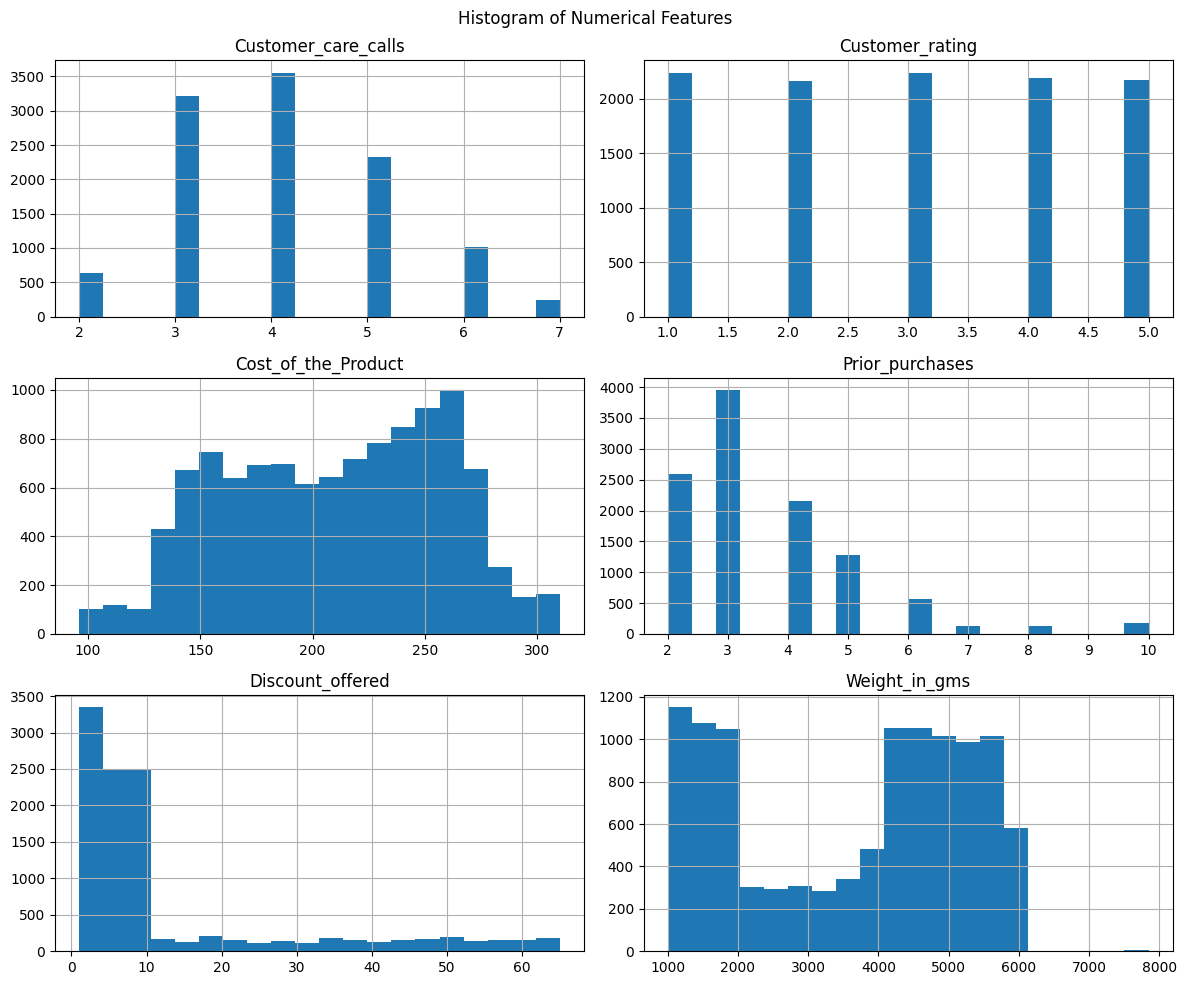

In [60]:
df[num_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle("Histogram of Numerical Features")
plt.tight_layout()
plt.show()

- Task 7: Create visualizations for categorical features (e.g., bar charts, pie charts).

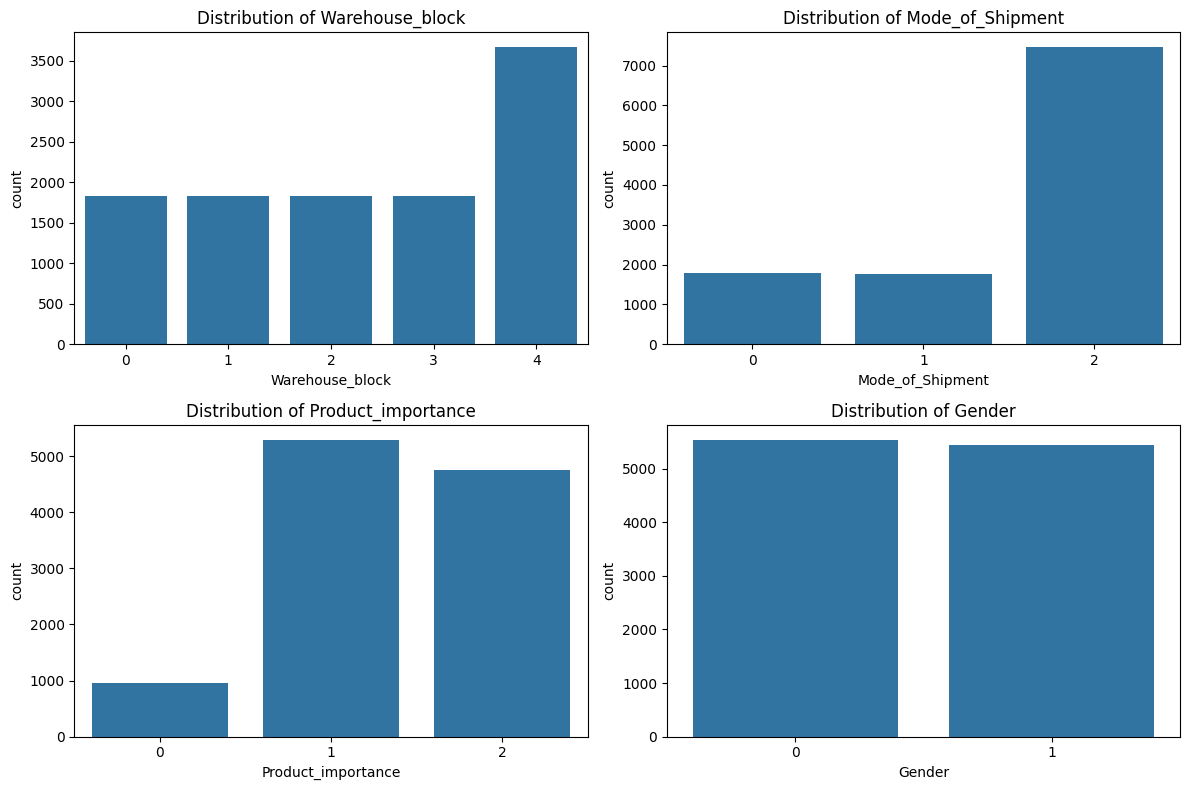

In [61]:
cat_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

plt.figure(figsize=(12, 8))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

- Task 8: Generate correlation heatmaps to identify relationships between numerical features.

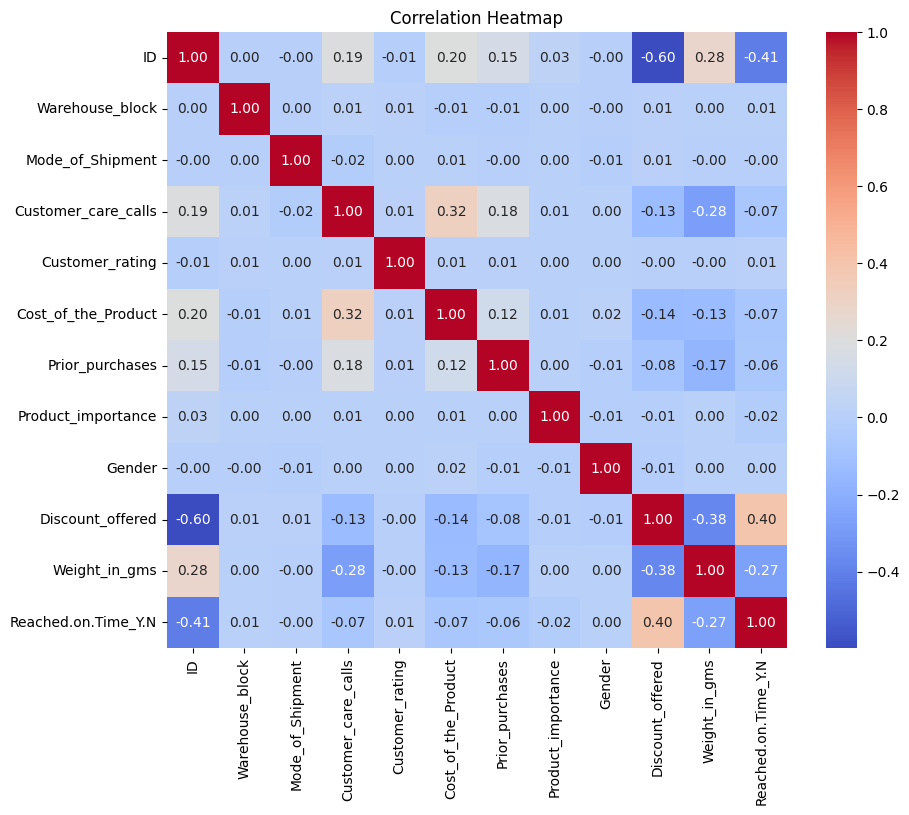

In [62]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [63]:
df.to_csv("cleaned_ecommerce_data.csv", index=False)

Feature Scaling

- Task 12: Split the dataset into training and testing sets.

In [65]:
X = df.drop(columns=['ID','Gender','Prior_purchases', 'Customer_rating','Reached.on.Time_Y.N'])
y = df['Reached.on.Time_Y.N']
print(y.value_counts())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64


In [72]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [75]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

ann_model = Sequential()
ann_model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(1, activation='sigmoid'))

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = ann_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6087 - loss: 0.6048 - val_accuracy: 0.6767 - val_loss: 0.5224
Epoch 2/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6428 - loss: 0.5422 - val_accuracy: 0.6705 - val_loss: 0.5196
Epoch 3/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6518 - loss: 0.5325 - val_accuracy: 0.6665 - val_loss: 0.5189
Epoch 4/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6595 - loss: 0.5222 - val_accuracy: 0.6659 - val_loss: 0.5174
Epoch 5/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6595 - loss: 0.5222 - val_accuracy: 0.6795 - val_loss: 0.5151
Epoch 6/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6522 - loss: 0.5313 - val_accuracy: 0.6824 - val_loss: 0.5155
Epoch 7/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6672 - loss: 0.5201 - val_accuracy: 0.6733 - val_loss: 0.5146
Epoch 8/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6696 - loss: 0.5202 - val_accuracy: 0.6812

In [76]:
loss, ann_accuracy = ann_model.evaluate(X_test_scaled, y_test)
print(f"\n✅ ANN Test Accuracy: {ann_accuracy:.4f}")


69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6829 - loss: 0.5075

✅ ANN Test Accuracy: 0.6895


- Task 14: Decision Tree

In [66]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)
print("\nDecision Tree:")
print(classification_report(y_test, y_pred_dt))


Decision Tree:
              precision    recall  f1-score   support

           0       0.57      0.56      0.57       895
           1       0.70      0.71      0.71      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



- Task 15: Random Forest

In [70]:
model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, y_train)
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           0       0.57      0.67      0.61       895
           1       0.74      0.65      0.69      1305

    accuracy                           0.66      2200
   macro avg       0.65      0.66      0.65      2200
weighted avg       0.67      0.66      0.66      2200



In [68]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt_cv = cross_val_score(dtree, X, y, cv=kfold, scoring='accuracy')
rf_cv = cross_val_score(rforest, X, y, cv=kfold, scoring='accuracy')

- Task 16: Model Comparison

In [71]:
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Decision Tree Accuracy: 0.6514
Random Forest Accuracy: 0.6573
